In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./heart.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


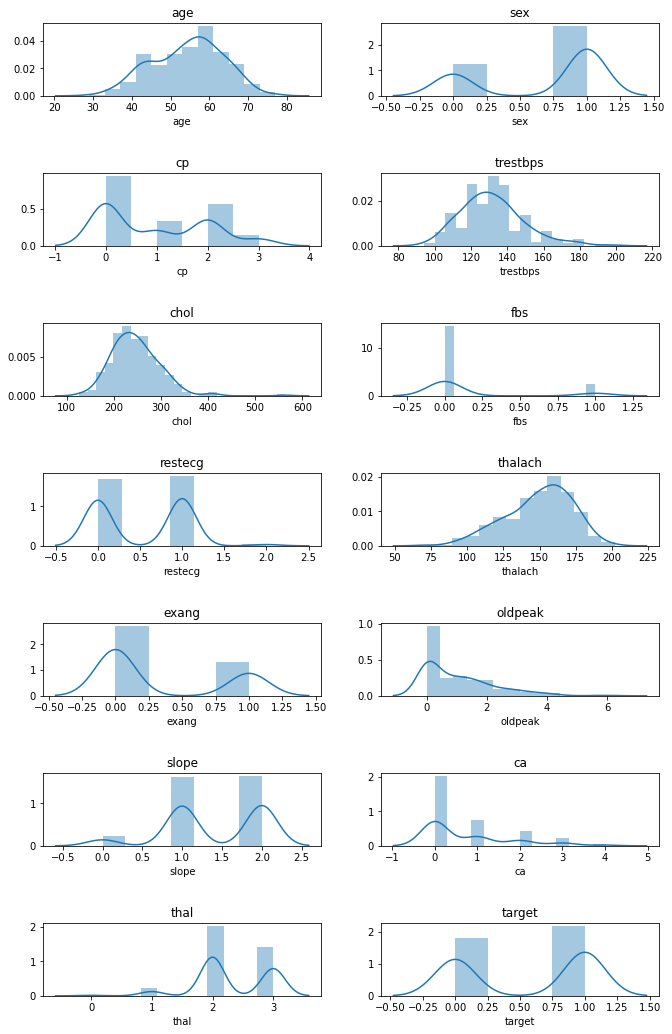

In [6]:
def distribution(data):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

distribution(data)

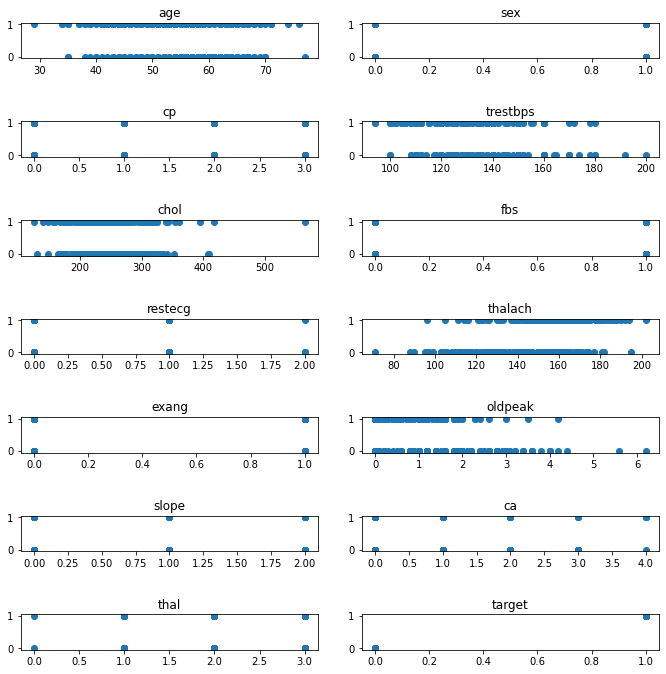

In [7]:
correlations(data, 'target')

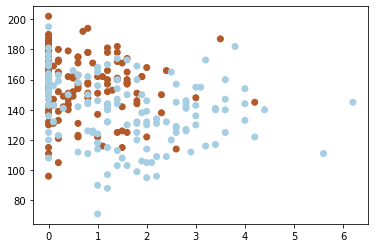

In [8]:
plt.scatter(data['oldpeak'], data['thalach'], c=data['target'], cmap=plt.cm.Paired)

In [14]:
# Probar para cada variable 

def prueba_simple(equis, ye, variable, alpha, iteraciones):
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    thetas = np.expand_dims(np.asarray([0,0], dtype='float64'),1)
    res = logistic.gradient_descent(xes, y, thetas, alpha, iteraciones)
    numeracion = [i for i in range(len(res))]
    costos = [i[1] for i in res]
    # Plotear la grafica de costos 
    plt.plot(numeracion, costos)
    plt.title("Costo por Iteraciones")
    plt.show()
    # Continuar a parametrizar la funcion 
    ok = res[len(res) - 1][0]
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(ok[0] + xl * ok[1])))
    # Grafica de resultado
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Funcion Sigmoide")
    plt.show()
    return ok

In [24]:
data_partida = data.copy()
response = pd.DataFrame(data_partida['target'])
xes = data_partida.drop('target', 1)

x_train, x_test, y_train, y_test = train_test_split(xes, response, test_size=0.33, random_state=42)

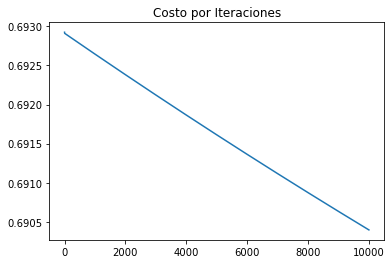

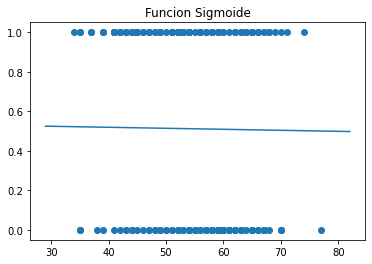

In [26]:
res1 = prueba_simple(x_train, y_train,'age', 0.001, 10000)

In [68]:
# agregar la fila de unos tambien 
def costo_simple(variables, thetas):
    ones = np.expand_dims(np.asarray([1 for i in range(len(x_test[variables]))]), 1)
    siguiente = np.expand_dims(x_test[variables], 1)
    entrada = np.hstack([ones, siguiente])
    costo = logistic.cost(entrada, y_test, thetas)
    return costo  

print(costo_simple('age', res1)[0])

0.6869973349833591


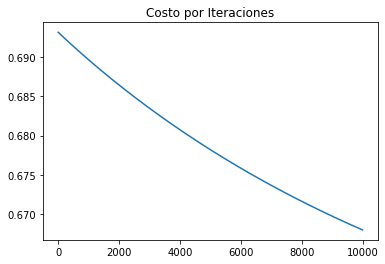

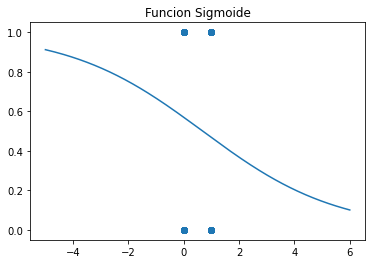

target    0.676983
dtype: float64


In [72]:
res2 = prueba_simple(x_train, y_train, 'sex', 0.001, 10000)
print(costo_simple('sex', res2))

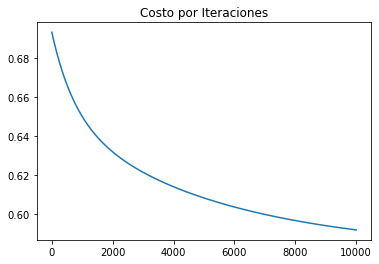

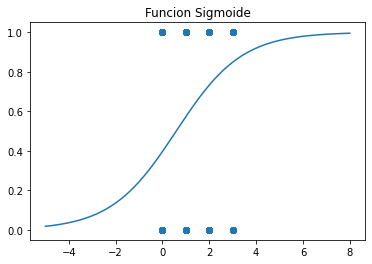

target    0.59944
dtype: float64


In [73]:
res3 = prueba_simple(x_train, y_train, 'cp', 0.001, 10000)
print(costo_simple('cp', res3))

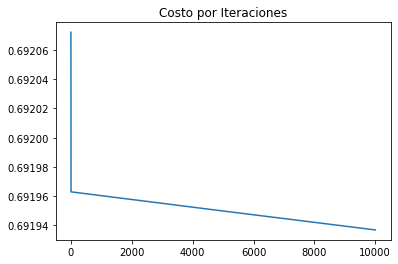

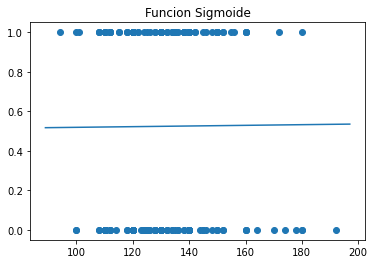

target    0.688679
dtype: float64


In [76]:
res3 = prueba_simple(x_train, y_train, 'trestbps', 0.0003, 10000)
print(costo_simple('trestbps', res3))

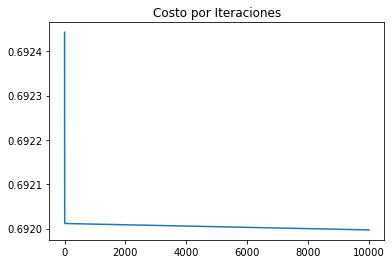

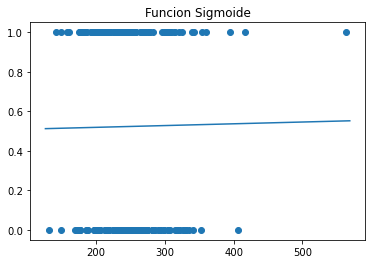

target    0.688761
dtype: float64


In [77]:
res4 = prueba_simple(x_train, y_train, 'chol', 0.0001, 10000)
print(costo_simple('chol', res4))

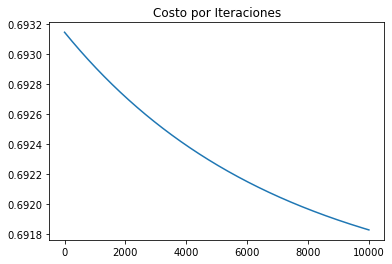

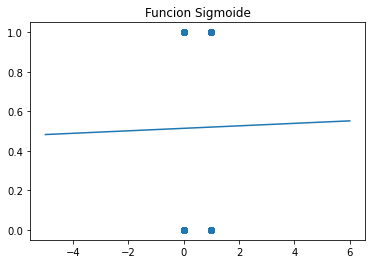

target    0.689508
dtype: float64


In [78]:
res5 = prueba_simple(x_train, y_train, 'fbs', 0.0003, 10000)
print(costo_simple('fbs', res5))

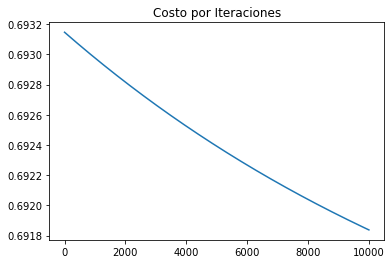

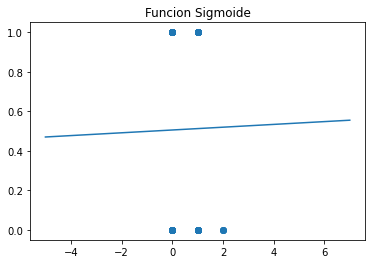

target    0.688307
dtype: float64


In [79]:
res6 = prueba_simple(x_train, y_train, 'restecg', 0.0001, 10000)
print(costo_simple('restecg', res6))

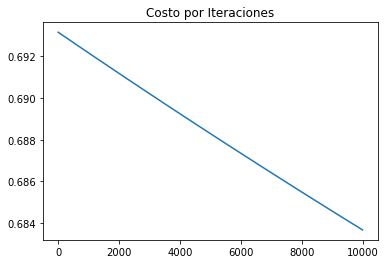

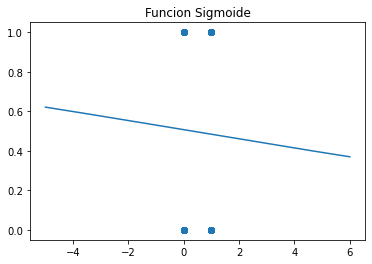

target    0.684649
dtype: float64


In [80]:
res7 = prueba_simple(x_train, y_train, 'exang', 0.0001, 10000)
print(costo_simple('exang', res7))

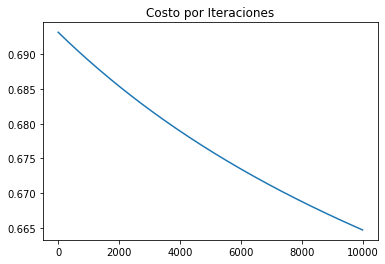

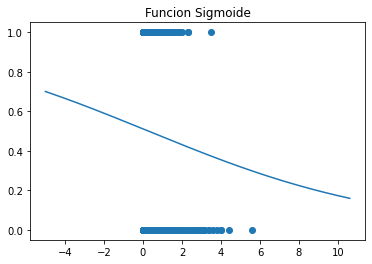

target    0.66492
dtype: float64


In [81]:
res8 = prueba_simple(x_train, y_train, 'oldpeak', 0.0001, 10000)
print(costo_simple('oldpeak', res8))

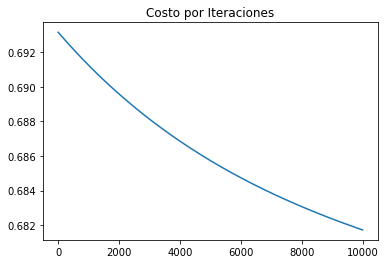

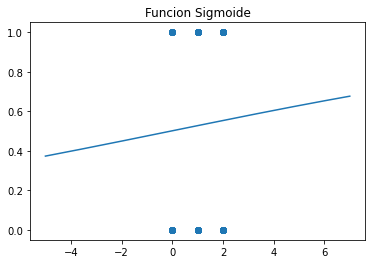

target    0.672528
dtype: float64


In [82]:
res9 = prueba_simple(x_train, y_train, 'slope', 0.0001, 10000)
print(costo_simple('slope', res9))

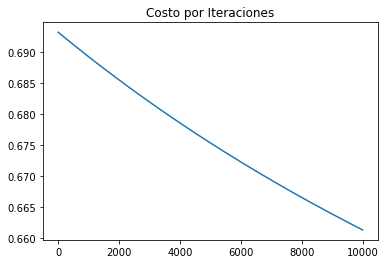

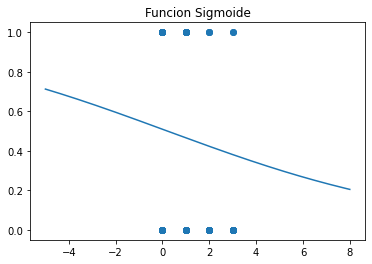

target    0.679858
dtype: float64


In [83]:
res10 = prueba_simple(x_train, y_train, 'ca', 0.0001, 10000)
print(costo_simple('ca', res10))

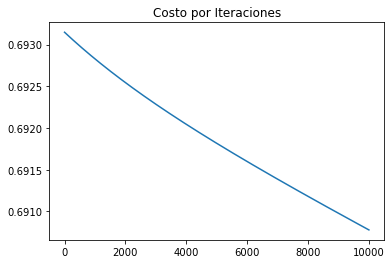

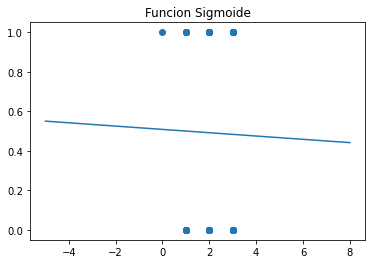

target    0.694053
dtype: float64


In [84]:
res11 = prueba_simple(x_train, y_train, 'thal', 0.0001, 10000)
print(costo_simple('thal', res11))